# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random

seed = 1337
random.seed(1337)
np.random.seed(1337)
torch.manual_seed(1337)
torch.backends.cudnn.deterministic = True

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app',seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.81451988e+00 -1.00000000e+00
  6.38908386e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  8.53890657e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

In [7]:
# Run agent

def run_agent(model_path):
    from ppo_agent import Agent

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]
    n_observations = env_info.vector_observations.shape[1]
    n_actions = brain.vector_action_space_size
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    agent = Agent(n_observations, n_actions)
    agent.load_state_dict(torch.load(model_path))

    scores = np.zeros(1)                          # initialize the score (for each agent)
    while True:
        obs = torch.Tensor(np.expand_dims(env_info.vector_observations[0], 0))
        with torch.no_grad():
            action, _, _, _ = agent.get_action_and_value(obs)
        torch.clamp(action, -1, 1)
        action = action.numpy()
        env_info = env.step(action)[brain_name]           # send all actions to the environment
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
# run_agent('checkpoints/model_step_976.pickle')

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
from ppo import run_ppo

run_ppo(env)

update 1/976. Last update in 4.0531158447265625e-06s
last 100 returns: 0.0
update 2/976. Last update in 6.581092119216919s
last 100 returns: 0.0
update 3/976. Last update in 6.159823894500732s
last 100 returns: 0.0
update 4/976. Last update in 6.52380895614624s
last 100 returns: 0.0
update 5/976. Last update in 6.319994926452637s
last 100 returns: 0.0
update 6/976. Last update in 6.233537912368774s
last 100 returns: 0.0
update 7/976. Last update in 6.51475715637207s
last 100 returns: 0.0
update 8/976. Last update in 6.390707015991211s
last 100 returns: 0.014705882024239092
update 9/976. Last update in 6.227819919586182s
last 100 returns: 0.0331578939957054
update 10/976. Last update in 6.646295070648193s
last 100 returns: 0.04428571329585144
update 11/976. Last update in 6.663900852203369s
last 100 returns: 0.05130434667934542
update 12/976. Last update in 6.3015971183776855s
last 100 returns: 0.06279999859631062
update 13/976. Last update in 6.622092247009277s
last 100 returns: 0.1225

last 100 returns: 3.409899923782796
update 99/976. Last update in 6.1454620361328125s
last 100 returns: 3.4690999224595727
update 100/976. Last update in 6.220260858535767s
last 100 returns: 3.4479999229311944
update 101/976. Last update in 6.111782073974609s
last 100 returns: 3.4331999232620003
update 102/976. Last update in 6.362166166305542s
last 100 returns: 3.487399922050536
update 103/976. Last update in 6.170238018035889s
last 100 returns: 3.529099921118468
update 104/976. Last update in 6.228644847869873s
last 100 returns: 3.6033999194577335
update 105/976. Last update in 6.302059888839722s
last 100 returns: 3.605499919410795
update 106/976. Last update in 6.155536890029907s
last 100 returns: 3.623699919003993
update 107/976. Last update in 6.178356885910034s
last 100 returns: 3.6237999190017582
update 108/976. Last update in 6.12607479095459s
last 100 returns: 3.6246999189816416
update 109/976. Last update in 6.1730499267578125s
last 100 returns: 3.5729999201372267
update 110/

last 100 returns: 4.468299900125712
update 194/976. Last update in 6.559006929397583s
last 100 returns: 4.448999900557101
update 195/976. Last update in 6.302268028259277s
last 100 returns: 4.390499901864677
update 196/976. Last update in 6.453565835952759s
last 100 returns: 4.338199903033674
update 197/976. Last update in 6.345592975616455s
last 100 returns: 4.352099902722984
update 198/976. Last update in 6.511441946029663s
last 100 returns: 4.369699902329594
update 199/976. Last update in 6.261496067047119s
last 100 returns: 4.31739990349859
update 200/976. Last update in 6.360170125961304s
last 100 returns: 4.361799902506172
update 201/976. Last update in 6.3077147006988525s
last 100 returns: 4.36049990253523
update 202/976. Last update in 6.4561028480529785s
last 100 returns: 4.3165999035164715
update 203/976. Last update in 6.233415126800537s
last 100 returns: 4.362899902481586
update 204/976. Last update in 6.0763840675354s
last 100 returns: 4.359599902555346
update 205/976. Las

last 100 returns: 5.090499886218458
update 290/976. Last update in 6.705431222915649s
last 100 returns: 5.055599886998534
update 291/976. Last update in 6.15254020690918s
last 100 returns: 5.062799886837602
update 292/976. Last update in 6.292795896530151s
last 100 returns: 5.030299887564033
update 293/976. Last update in 6.1573569774627686s
last 100 returns: 5.10399988591671
update 294/976. Last update in 6.221529006958008s
last 100 returns: 5.077399886511266
update 295/976. Last update in 6.148281812667847s
last 100 returns: 5.052799887061119
update 296/976. Last update in 6.0707480907440186s
last 100 returns: 5.043099887277931
update 297/976. Last update in 6.0952019691467285s
last 100 returns: 5.033699887488037
update 298/976. Last update in 6.185128211975098s
last 100 returns: 5.06089988688007
update 299/976. Last update in 6.203052997589111s
last 100 returns: 5.017099887859076
update 300/976. Last update in 6.246318101882935s
last 100 returns: 4.9748998888023195
update 301/976. L

last 100 returns: 4.758499893639237
update 386/976. Last update in 6.13028621673584s
last 100 returns: 4.7650998934917155
update 387/976. Last update in 6.090268135070801s
last 100 returns: 4.783399893082678
update 388/976. Last update in 6.132641792297363s
last 100 returns: 4.763799893520773
update 389/976. Last update in 6.115864992141724s
last 100 returns: 4.809499892499298
update 390/976. Last update in 6.1147918701171875s
last 100 returns: 4.784099893067032
update 391/976. Last update in 6.189741134643555s
last 100 returns: 4.797599892765284
update 392/976. Last update in 6.150761842727661s
last 100 returns: 4.72809989431873
update 393/976. Last update in 6.112323045730591s
last 100 returns: 4.708499894756824
update 394/976. Last update in 6.108867883682251s
last 100 returns: 4.700099894944579
update 395/976. Last update in 6.159840106964111s
last 100 returns: 4.721599894464016
update 396/976. Last update in 6.111248254776001s
last 100 returns: 4.714699894618243
update 397/976. La

last 100 returns: 4.499299899432808
update 482/976. Last update in 6.1348137855529785s
last 100 returns: 4.436199900843203
update 483/976. Last update in 6.10558009147644s
last 100 returns: 4.457499900367111
update 484/976. Last update in 6.128434896469116s
last 100 returns: 4.459099900331348
update 485/976. Last update in 6.117555141448975s
last 100 returns: 4.45209990048781
update 486/976. Last update in 6.087500095367432s
last 100 returns: 4.4688999001123015
update 487/976. Last update in 6.095152139663696s
last 100 returns: 4.4598999003134665
update 488/976. Last update in 6.1448729038238525s
last 100 returns: 4.463199900239706
update 489/976. Last update in 6.085841178894043s
last 100 returns: 4.501799899376929
update 490/976. Last update in 6.112619161605835s
last 100 returns: 4.48129989983514
update 491/976. Last update in 6.104870796203613s
last 100 returns: 4.52109989894554
update 492/976. Last update in 6.108031988143921s
last 100 returns: 4.487199899703264
update 493/976. La

last 100 returns: 4.406999901495874
update 578/976. Last update in 6.102691173553467s
last 100 returns: 4.3967999017238615
update 579/976. Last update in 6.097701787948608s
last 100 returns: 4.3432999029196795
update 580/976. Last update in 6.168330907821655s
last 100 returns: 4.283399904258549
update 581/976. Last update in 6.106828927993774s
last 100 returns: 4.28859990414232
update 582/976. Last update in 6.088874101638794s
last 100 returns: 4.298299903925508
update 583/976. Last update in 6.098775863647461s
last 100 returns: 4.303399903811514
update 584/976. Last update in 6.136919021606445s
last 100 returns: 4.260099904779345
update 585/976. Last update in 6.114118814468384s
last 100 returns: 4.310499903652817
update 586/976. Last update in 6.100374937057495s
last 100 returns: 4.259399904794991
update 587/976. Last update in 6.138592958450317s
last 100 returns: 4.265899904649705
update 588/976. Last update in 6.094370126724243s
last 100 returns: 4.176799906641245
update 589/976. L

last 100 returns: 4.619399896748364
update 674/976. Last update in 6.120839834213257s
last 100 returns: 4.737199894115329
update 675/976. Last update in 6.221345901489258s
last 100 returns: 4.64789989611134
update 676/976. Last update in 6.3456339836120605s
last 100 returns: 4.551699898261577
update 677/976. Last update in 6.327970027923584s
last 100 returns: 4.57599989771843
update 678/976. Last update in 6.341868162155151s
last 100 returns: 4.55839989811182
update 679/976. Last update in 6.139255046844482s
last 100 returns: 4.603299897108227
update 680/976. Last update in 6.181417942047119s
last 100 returns: 4.625299896616489
update 681/976. Last update in 6.372838735580444s
last 100 returns: 4.617599896788597
update 682/976. Last update in 6.233252048492432s
last 100 returns: 4.606799897029996
update 683/976. Last update in 6.16053318977356s
last 100 returns: 4.599799897186458
update 684/976. Last update in 6.186172008514404s
last 100 returns: 4.663999895751476
update 685/976. Last 

last 100 returns: 4.838899891842157
update 770/976. Last update in 6.084791660308838s
last 100 returns: 4.7670998934470115
update 771/976. Last update in 6.105223178863525s
last 100 returns: 4.812999892421066
update 772/976. Last update in 6.126777172088623s
last 100 returns: 4.872099891100079
update 773/976. Last update in 6.1091859340667725s
last 100 returns: 4.841499891784042
update 774/976. Last update in 6.1120100021362305s
last 100 returns: 4.827099892105907
update 775/976. Last update in 6.101885795593262s
last 100 returns: 4.874699891041964
update 776/976. Last update in 6.133699178695679s
last 100 returns: 4.918099890071899
update 777/976. Last update in 6.098462820053101s
last 100 returns: 4.907299890313298
update 778/976. Last update in 6.106404066085815s
last 100 returns: 4.8987998905032875
update 779/976. Last update in 6.127103090286255s
last 100 returns: 4.914099890161306
update 780/976. Last update in 6.099194049835205s
last 100 returns: 4.947199889421463
update 781/976

last 100 returns: 4.651099896039813
update 866/976. Last update in 6.109148740768433s
last 100 returns: 4.6628998957760635
update 867/976. Last update in 6.1304497718811035s
last 100 returns: 4.679699895400554
update 868/976. Last update in 6.143864870071411s
last 100 returns: 4.632399896457791
update 869/976. Last update in 6.097844839096069s
last 100 returns: 4.602799897119403
update 870/976. Last update in 6.133098125457764s
last 100 returns: 4.628199896551669
update 871/976. Last update in 6.181222915649414s
last 100 returns: 4.5984998972155156
update 872/976. Last update in 6.097347736358643s
last 100 returns: 4.667099895682186
update 873/976. Last update in 6.180929899215698s
last 100 returns: 4.713299894649535
update 874/976. Last update in 6.090261220932007s
last 100 returns: 4.7676998934336
update 875/976. Last update in 6.152531862258911s
last 100 returns: 4.808699892517179
update 876/976. Last update in 6.127697944641113s
last 100 returns: 4.853399891518056
update 877/976. L

last 100 returns: 4.743399893976748
update 962/976. Last update in 6.120569944381714s
last 100 returns: 4.80559989258647
update 963/976. Last update in 6.1291258335113525s
last 100 returns: 4.802299892660231
update 964/976. Last update in 6.098384857177734s
last 100 returns: 4.812299892436713
update 965/976. Last update in 6.137629747390747s
last 100 returns: 4.835799891911447
update 966/976. Last update in 6.101567029953003s
last 100 returns: 4.8281998920813205
update 967/976. Last update in 6.145063877105713s
last 100 returns: 4.837699891868978
update 968/976. Last update in 6.090719938278198s
last 100 returns: 4.824399892166257
update 969/976. Last update in 6.121798753738403s
last 100 returns: 4.848699891623109
update 970/976. Last update in 6.096599817276001s
last 100 returns: 4.82529989214614
update 971/976. Last update in 6.083404779434204s
last 100 returns: 4.860699891354889
update 972/976. Last update in 6.124543905258179s
last 100 returns: 4.896599890552461
update 973/976. La

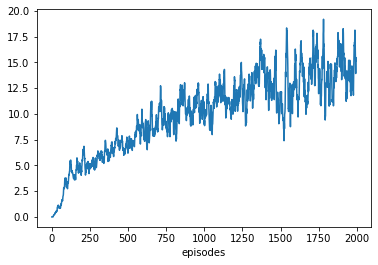

In [13]:
def plot_learning_curve(results_path):
    import pickle
    import matplotlib.pyplot as plt
    from collections import deque
    import os

    with open(results_path, 'rb') as f:
        _, total_rewards = zip(*pickle.load(f))

    smoothed = []
    queue = deque([], maxlen=10)
    for r in total_rewards:
        queue.append(r)
        smoothed.append(sum(queue)/len(queue))
    fig,ax = plt.subplots()
    ax.plot(smoothed)
    ax.set_xlabel('episodes')
    plt.savefig(f'{os.path.dirname(results_path)}/learning_curve.png')
    plt.show()
plot_learning_curve('checkpoints/230303_2300/eplen_and_returns_976.pickle')

In [11]:
path = f'checkpoints/03/eplen_and_returns_976.pickle'
import os
print(os.path.dirname(path))

checkpoints/03


In [10]:
# from ddpg_agent import Agent

# agent = Agent(state_size=33, action_size=4, random_seed=2)
# scores = agent.run_unity_ddpg(env)
# env.close()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(np.arange(1, len(scores)+1), scores)
# plt.ylabel('Score')
# plt.xlabel('Episode #')
# plt.show()